In [1]:
!pip install -U chai-guanaco

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.8 MB/s eta 0:00:00
  Created wheel for chai-guanaco: filename=chai_guanaco-1.1.19-py3-none-any.whl size=28101 sha256=089842bb069696d474bde10d225c9b243ce20192574ed4d308618f3f3c221d8d
  Stored in directory: /root/.cache/pip/wheels/c7/62/24/c510731853b20deeaecc5e8b8a90883498fe008a780942e087
Successfully built chai-guanaco
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.3.0
    Uninstalling pydantic-2.3.0:
      Successfully uninstalled pydantic-2.3.0


## Welcome to Guanaco! 🚀

In this demo, you will be:
1. Submitting a huggingface model to Chai
2. Getting real-time user feedback for your model
3. Browsing through the Guanaco leaderboard
4. Getting your model submission id (in case you've lost it)
5. Deactivating your model so you can make a submission for yourself

## Installation and Login 👋

Logging into guanaco is done as a one-off task, your developer key will be written under your home directory.

Alternatively, you can just run `chai-guanaco login` inside your terminal

In [2]:
import chai_guanaco as chai

In [3]:
chai.developer_login()

Welcome to Chai Guanaco 🚀!
By logging in, we will create a file under /root/.chai-guanaco/developer_key.json.
Please enter your developer key: CR_4778fd181cf745aeb4ab1c561a4404c7


## Submitting Your First Model 🧑‍🚀

To submit a model, you need to first push the model to huggingface. Be sure to also push the tokenizer and model architecture config files, so that we can verify the type of model that you have deployed.

You can modify the model generation parameters, note: once your model is deployed, it will be generating texts using the parameters you've selected.

The model submission goes through (roughly speaking) three stages:
1. We will download your model from Huggingface
2. We will load it, cast it to float 16 then Tritonize it (this saves us 💰)
3. We will deploy and load balance the model and verify it via a stress-checker (so we know it is robust against rea-life usage)

Each stage's speed is subject to the kind of machines your job is allocated to, so in total it will take between 5 - 20 minutes

**Note: pending animation unfortunately does not show up in google Colab / Jetbrain notebook**

In [ ]:
import chai_guanaco as chai
from chai_guanaco.formatters import PromptFormatter

class cheekyChameliFormatter(PromptFormatter):
    memory_template = "###Instruction: You are a curious, open to experiences, extremely chatty bot that replies verbose. \n{bot_name}'s Persona: {memory}\n####\n"
    prompt_template = "{prompt}\n<START>\n"
    bot_template = "{bot_name}: {message}\n"
    user_template = "{user_name}: {message}\n"
    response_template = "{bot_name}:"

model_url = "TokenBender/cheekyChameli_13B" # Your model URL

generation_params = {'temperature': 1.0, 'repetition_penalty': 1.2, 'top_p': 0.2, "top_k": 30, "stopping_words": ['\n'], "presence_penalty": 0., "frequency_penalty": 0.}
submission_parameters = {'model_repo': model_url, 'generation_params': generation_params, 'model_name': 'cheekyChameliRPv1', "formatter": cheekyChameliFormatter()}

submitter = chai.ModelSubmitter()
submission_id = submitter.submit(submission_parameters)


Model Submission ID: tokenbender-cheekychameli-13b_v3
Your model is being deployed to Chai Guanaco, please wait for approximately 10 minutes...



Model successfully deployed!




Deactivate existing bot



In [ ]:
chai.deactivate_model("tokenbender-cheekychameli-13b_v1")

tokenbender-cheekychameli-13b_v1 has been successfully deactivated!


'tokenbender-cheekychameli-13b_v1 has been successfully deactivated!'

## Chat with Your Submission

Once your model is deployed, you can verify its behaviour and raw input. We have provided a range of bots that you can chat with (these are the bots that appear on the current Chai App leaderboard and are user-generated)

In [4]:
chatbot = chai.SubmissionChatbot(submission_id)
chatbot.show_available_bots()

NameError: ignored

Select a bot you are interested in speaking with and run the following command. You can always exit the conversation by replying with 'exit'

In [ ]:
chatbot.chat('nerd_girl', show_model_input=False)

In order to see exactly what is being fed into your model when you are speaking with the bot, simply run:

In [ ]:
chatbot.chat('nerd_girl', show_model_input=True)

## Getting Model Feedback From Real Life Users 📖

![3pOQqh8 - Imgur.png](attachment:./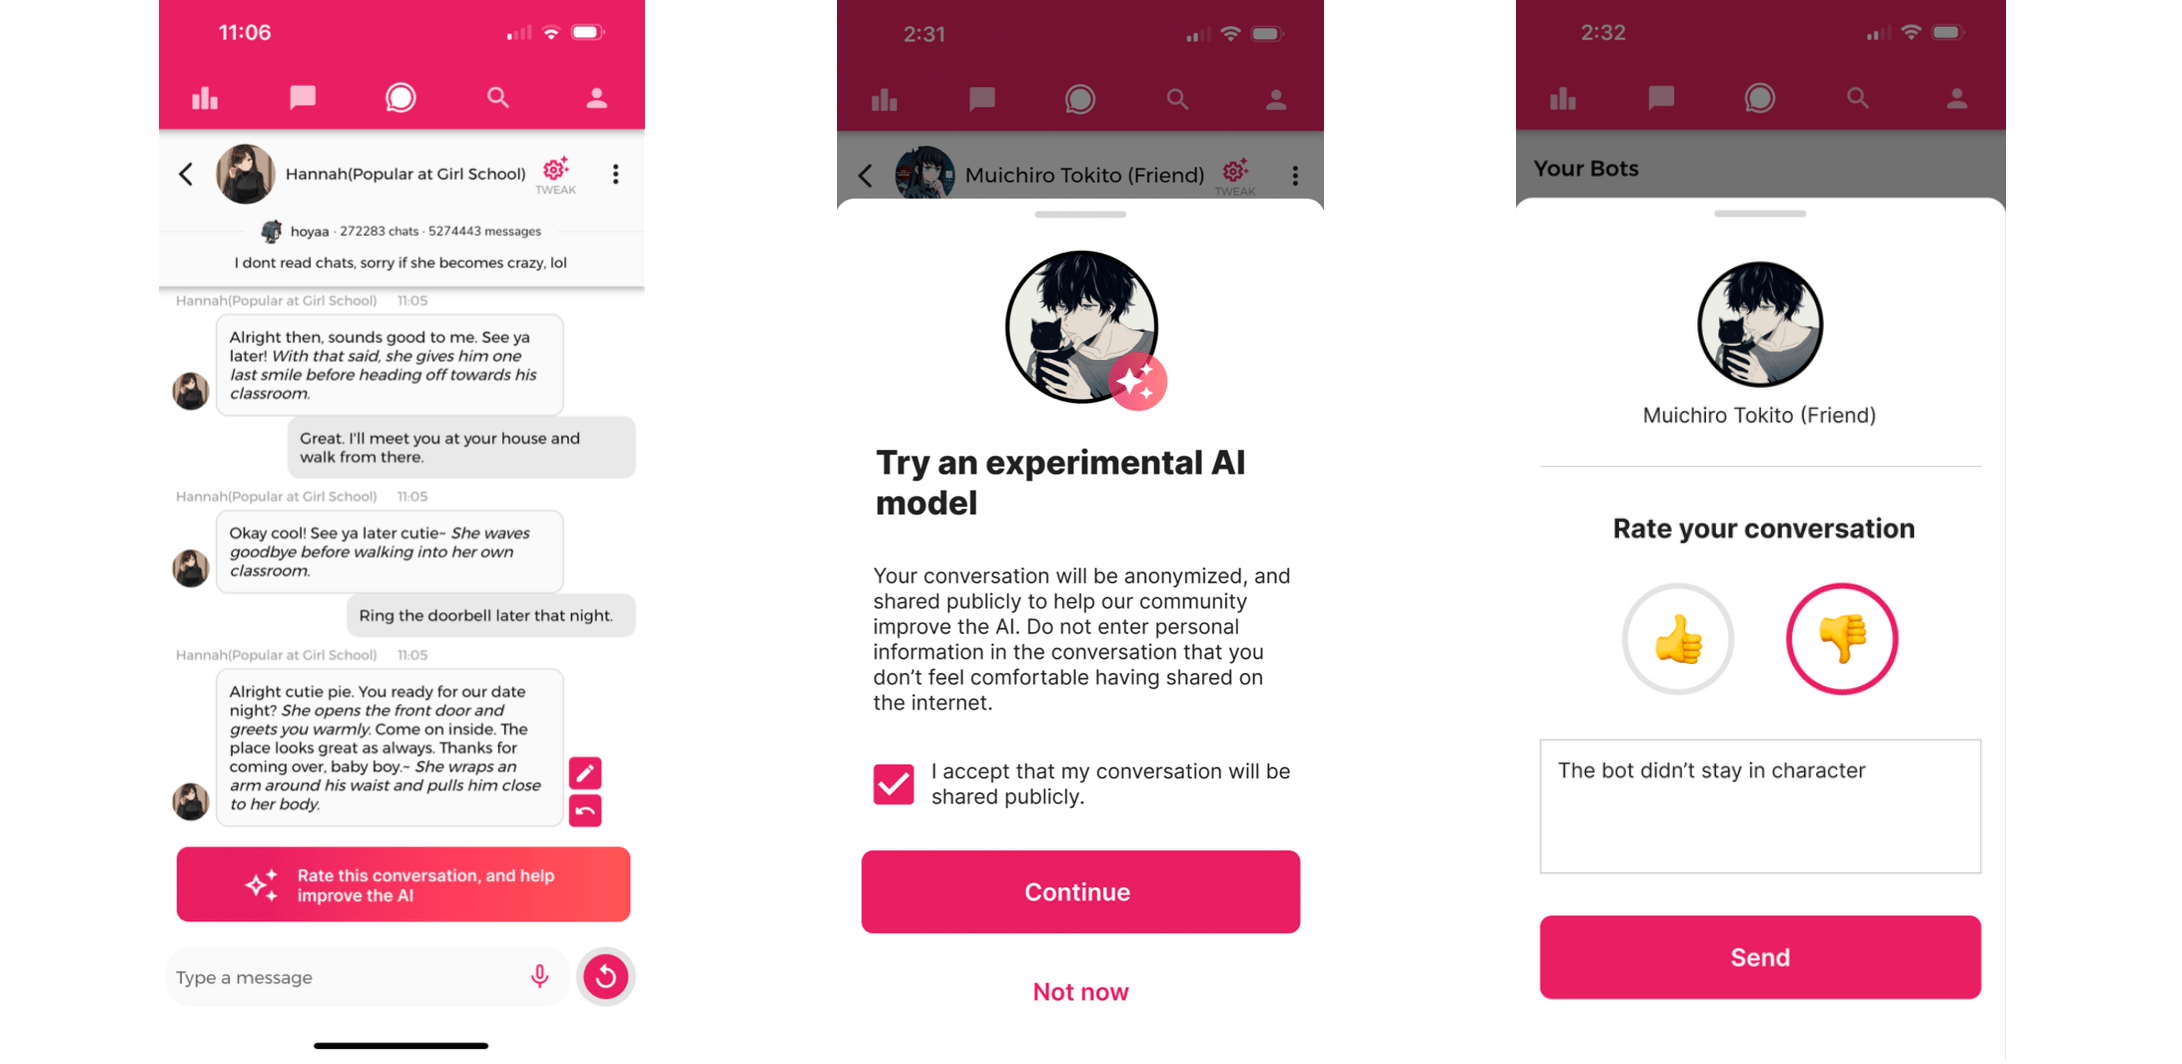)
Now your model is deployed to the Chai platform, real users who enter the "battle mode" on the app will be able to speak with your model. They will rate your model and provide you with verbal feedback. We hope the verbal feedback will help you with the model development process :)

**Note:** It typically takes around 2-5 minutes after you submit a model before feedbacks are recieved, just retry the next cell if you see an error.

In [7]:
submission_id = "tokenbender-cheekychameli-13b_v2"
#submission_id = "tokenbender-cheekychameli-13b_v3"

model_feedback = chai.get_feedback(submission_id)
model_feedback.sample()

### Conversation ###
Emo bestfriend |Girl+Girl•Top|: Your best friend, Yuri, is very pretty and popular with guys but hasn’t dated anyone ever since you guys have met. You guys have been friends since middle school and ever since Yuri has been very touchy and flirty towards you but you think it is just a joke. Though you have feelings for Yuri you think she is just teasing you.

*Sees you eating lunch by yourself and come up behind you sliding my hands down your shoulder* Hey~ Did you miss me?
Anonymous user: yes!
Emo bestfriend |Girl+Girl•Top|: *Smiles and leans in to kiss your cheek* I'm glad you did. So, what's been going on with you?
Anonymous user: como assim?
Emo bestfriend |Girl+Girl•Top|: *Raises an eyebrow and grins* You know what I mean. Anything interesting happen at school or with your crush?
Anonymous user: huh?
Emo bestfriend |Girl+Girl•Top|: *Laughs softly and shakes her head* Never mind. It's just me being nosy again. So, what did you do over the weekend?
Anonymous user

In the text above, the Feedback section in green is a Chai user's feedback for the entire conversation they've had with your model.

If you find a bot which says "deleted" it means the user has "retried" the message, i.e. they were not happy with it and decided to re-roll the message.

The `Feedback` object returned also has two attributes: `df` and `raw_data`, which contains the formatted and raw feedback data respectively. We hope you will find these useful.

In [ ]:
df = model_feedback.df
df

,conversation_id,bot_id,user_id,conversation,thumbs_up,feedback,model_name,public
0,_bot_0024ae79-4151-4a43-b3d4-e1225970c851_kIn7...,_bot_0024ae79-4151-4a43-b3d4-e1225970c851,kIn7q3Jtr7MKeieU35i54YYxrk13,teacher - Mr. Romano (ArZ): after you got tran...,True,\n,tokenbender-cheekychameli-13b_v2,True
1,_bot_025c30a9-4a5b-4721-9894-6fcc39fe8bc4_o1tq...,_bot_025c30a9-4a5b-4721-9894-6fcc39fe8bc4,o1tq1FhwDLNBtV57IM1gHZawboZ2,XXXXXXXXXXXXXXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXX...,False,N/A,tokenbender-cheekychameli-13b_v2,False
2,_bot_04b42e54-9a04-4caf-ac28-6e7f7a504867_b4r6...,_bot_04b42e54-9a04-4caf-ac28-6e7f7a504867,b4r6pol94vUrNLtngCFtfNr3q242,"William – Yandere boy: _He loves you badly, Al...",False,Nah,tokenbender-cheekychameli-13b_v2,True
3,_bot_07726967-cc05-47e0-8380-3b5a06a25d05_FCex...,_bot_07726967-cc05-47e0-8380-3b5a06a25d05,FCexRoZaT7U4GDsaCq6SP8094cz2,XXXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,True,N/A,tokenbender-cheekychameli-13b_v2,False
4,_bot_09c0e662-c1b1-409d-af79-2d4ba3587280_KOhk...,_bot_09c0e662-c1b1-409d-af79-2d4ba3587280,KOhk9cD8P1Rtgu04u87CsIfKzr52,XXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,True,N/A,tokenbender-cheekychameli-13b_v2,False
...,...,...,...,...,...,...,...,...
92,_bot_f4e15873-2c0f-4212-bf09-b70538001784_EAia...,_bot_f4e15873-2c0f-4212-bf09-b70538001784,EAiaMduXOfMLesOeKQHb9Z3ID3i1,XXXXXXXXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXXXXXXXX...,False,N/A,tokenbender-cheekychameli-13b_v2,False
93,_bot_f9dcf9ba-94b8-4e4d-8f69-77712dee1c2d_P93x...,_bot_f9dcf9ba-94b8-4e4d-8f69-77712dee1c2d,P93xgAll3Hb01coij9yTu68iui23,XXXXXXXXXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXXXXXXX...,False,N/A,tokenbender-cheekychameli-13b_v2,False
94,_bot_fc7ac6da-2ca1-43bf-baae-8ea0e94aba1c_EAia...,_bot_fc7ac6da-2ca1-43bf-baae-8ea0e94aba1c,EAiaMduXOfMLesOeKQHb9Z3ID3i1,Alice | Hot cleaning lady.: *Alice is hired at...,False,No,tokenbender-cheekychameli-13b_v2,True
95,_bot_fd0f5242-8202-4b77-9594-25091131cbc6_dTcs...,_bot_fd0f5242-8202-4b77-9594-25091131cbc6,dTcs7lFBsUdHKFJnVYx5qxDPKl13,XXXXXXXXXXXXXXXXXXX: XXXXXXXXXXXXXXXXXXXXXXXXX...,True,N/A,tokenbender-cheekychameli-13b_v2,False


In [8]:
raw_data = model_feedback.raw_data
raw_data

{'feedback': {'_bot_0024ae79-4151-4a43-b3d4-e1225970c851_kIn7q3Jtr7MKeieU35i54YYxrk13_1694035030619_1694035234': {'conversation_id': '_bot_0024ae79-4151-4a43-b3d4-e1225970c851_kIn7q3Jtr7MKeieU35i54YYxrk13_1694035030619',
   'messages': [{'content': 'after you got transferred from another school,\n\nyou decided to act up a lot,\n\nsuch as, pulling pranks, taking money, pushing kids into lockers, etc.\n\nthis all came to a halt when a teacher from italy moved.. (he has a heavy Italian accent)\n\nhe noticed your behavior but.. he seemed nice to you..\n\neven though he was rather cruel to the other kids..\n\n-present-\n\n*for some reason, you get the feeling Mr. Romano is..* **attracted** to you..?*\n\n*he scheduled a meeting, so you headed to his office..*\n\n “oh hello y/n!” *he grinned, sitting back in his chair, as you sat down, his face turned serious,* “we need to talk about your behavior.” *he sighed*',
     'conversation_id': '_bot_0024ae79-4151-4a43-b3d4-e1225970c851_kIn7q3Jtr7MKe

## Getting Guanaco Leaderboard 🥇

In [ ]:
leaderboard = chai.display_leaderboard()

In [9]:
leaderboard = chai.display_leaderboard(detailed=True)

Getting Metrics:  36%|███▌      | 29/81 [00:09<00:12,  4.15it/s]/usr/local/lib/python3.10/dist-packages/chai_guanaco/metrics.py:135: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores[is_public])
Getting Metrics: 100%|██████████| 81/81 [00:28<00:00,  2.83it/s]


💎 Leaderboard:
                       submission_id developer_uid  \
0            anhnv125-llama-op-v8_v5       vietanh   
1   the-face-of-goonery-huginn-13_v7       goonery   
2   tokenbender-cheekychameli-13b_v3   TokenBender   
3         khoantap-evil-wizard-rp_v1    khoangothe   
4                  lemtenku-model_v4          leem   
5            anhnv125-llama-op-v4_v9       vietanh   
6         khoantap-evil-wizard-rp_v4    khoangothe   
7   tokenbender-cheekychameli-13b_v2   TokenBender   
8       pygmalionai-mythalion-13b_v2         alpin   
9                  lemtenku-model_v5          leem   
10       ebony59-llama7b-ao3-100k_v6         ebony   
11  fredithefish-guanaco-13b-unc_v31         fredi   
12                molagbal-mio-7b_v1      molagbal   
13  uukuguy-speechless-llama2-her_v2         xl402   
14        khoantap-kind-wizard-rp_v1    khoangothe   
15      ebony59-llama-7b-ao3-1to1_v4         ebony   
16   pygmalionai-pygmalion-2-13b_v17         alpin   
17  fredithe

## Getting Your Submission IDs + Deactivating Models 😶‍🌫️

In case you've forgotten/ lost track with your submission IDs, you can easily retrieve them by running:

In [ ]:
submission_ids = chai.get_my_submissions()
submission_ids

{'tokenbender-cheekychameli-13b_v1': 'deployed',
 'tokenbender-cheekychameli-13b_v2': 'deployed',
 'tokenbender-llama2-7b-chat-hf_v1': 'inactive',
 'tokenbender-llama2-7b-chat-hf_v2': 'inactive',
 'tokenbender-llama2-7b-chat-hf_v3': 'inactive'}

By default, we only allow 1 active model (i.e. a model that is being served to users) per developer key. Let's tear down the dummy (Pygmalion) model we've just submitted so you can submit a model of your own:

In [ ]:
for sub_id, status in submission_ids.items():
    if status in ['deployed', 'pending']:
        chai.deactivate_model(sub_id)

Don't worry, you can still retrieve your model's old feedback

In [ ]:
model_feedback = chai.get_feedback(submission_id)
model_feedback.sample()